<a href="https://colab.research.google.com/github/patech123/gomycode-data-science/blob/main/Machine_Learning_Algorithms_Checkpoint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What You're Aiming For

In this checkpoint, we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods.

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

➡️ Dataset link

https://i.imgur.com/hv2Ynyn.jpg

➡️ Columns explanation


Instructions

Part1: supervised learning

1. Import you data and perform basic data exploration phase
2. Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
3. Prepare your dataset for the modelling phase
4. Apply Decision tree, and plot its ROC curve
5. Try to improve your model performance by changing the model hyperparameters

 Part2: unsupervised learning

1. Drop out the target variable
2. Apply K means clustering and plot the clusters
3. Find the optimal K parameter
4. Interpret the results

In [1]:
import numpy as np
import pandas as pd
microsoft = pd.read_csv('/content/Microsoft_malware_dataset_min.csv')
microsoft

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,Core,0,1.0,0.0,1.0,th1,177
99996,1,0.0,0.0,Professional,1,1.0,0.0,1.0,rs4,206
99997,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs3,93
99998,0,NaN,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29


In [2]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [3]:
!pip install numpy

In [4]:
!pip install ydata-profiling

In [5]:
from ydata_profiling import ProfileReport

In [6]:
profile = ProfileReport(microsoft, title='Ydata_Profiling Report', explorative= True)

In [7]:
profile.to_file('/content/Microsoft_malware_dataset_min.csv')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:375: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
missing_value = microsoft.isnull().sum()
print(missing_value)

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64


In [9]:
microsoft.dropna(inplace=True)


In [10]:
microsofts = microsoft.drop_duplicates()
print(microsofts)

       HasDetections  Wdft_IsGamer  Census_IsVirtualDevice Census_OSEdition  \
0                  0           0.0                     0.0     Professional   
1                  0           0.0                     0.0     Professional   
2                  0           0.0                     0.0             Core   
3                  1           0.0                     0.0     Professional   
4                  1           0.0                     0.0             Core   
...              ...           ...                     ...              ...   
99898              0           0.0                     0.0     Professional   
99899              0           0.0                     0.0     Professional   
99927              0           1.0                     0.0             Core   
99943              0           1.0                     0.0             Core   
99962              1           1.0                     0.0     Professional   

       Census_HasOpticalDiskDrive  Firewall  SMode 

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [14]:
for columns in ['Census_OSEdition','OsPlatformSubRelease']:
    microsofts[columns] = label_encoder.fit_transform(microsofts[columns])

<ipython-input-14-0eab578ebffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsofts[columns] = label_encoder.fit_transform(microsofts[columns])
<ipython-input-14-0eab578ebffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microsofts[columns] = label_encoder.fit_transform(microsofts[columns])


In [16]:
target_variable = 'HasDetections'
feature_variable = ['Wdft_IsGamer', 'Census_IsVirtualDevice','Census_OSEdition','Census_HasOpticalDiskDrive',	'Firewall','SMode','IsProtected',	'OsPlatformSubRelease','CountryIdentifier']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = microsofts[target_variable]
X = microsofts[feature_variable].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape

(11784, 9)

In [23]:
y_train.shape

(11784,)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [25]:
#applying tree algorithm
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)   #fitting our model
y_pred=tree.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.2834351663272234


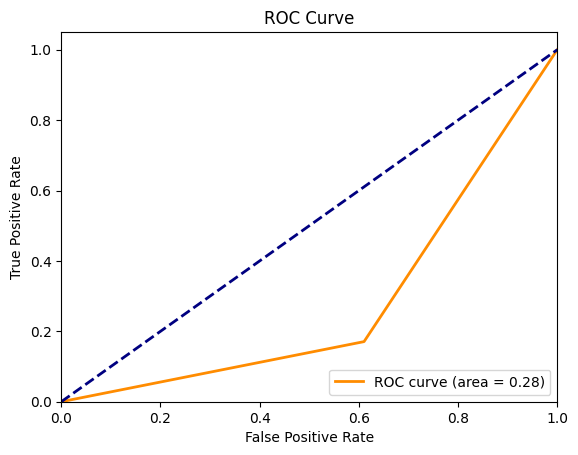

In [27]:

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()